In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/african-development-bank/finance1.csv
/kaggle/input/african-development-bank/transport1.csv
/kaggle/input/african-development-bank/multisector1.csv
/kaggle/input/african-development-bank/power1.csv
/kaggle/input/african-development-bank/agri1.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df=pd.read_csv("/kaggle/input/african-development-bank/finance1.csv",encoding='ISO-8859-1')
df.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign


In [4]:
#library to automaticly detect type of encoding 
!pip install chardet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 7.3 MB/s eta 0:00:00


In [5]:
import chardet
with open("/kaggle/input/african-development-bank/finance1.csv",'rb')as f:
    result=chardet.detect(f.read())
print(result)
df=pd.read_csv('/kaggle/input/african-development-bank/finance1.csv',encoding=result['encoding'])
df.head()

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign


In [6]:
df1=df.dropna()
df1["Starting Date"]=pd.to_datetime(df['Starting Date'])

/tmp/ipykernel_18/103735090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Starting Date"]=pd.to_datetime(df['Starting Date'])


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Project Code         280 non-null    object        
 1   Title                280 non-null    object        
 2   Commitment in U.A    280 non-null    object        
 3   Country              280 non-null    object        
 4   Starting Date        280 non-null    datetime64[ns]
 5   Status               280 non-null    object        
 6   Source of Financing  280 non-null    object        
 7   Sector               280 non-null    object        
 8   Sovereign            280 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 21.9+ KB


In [8]:
df1["year"]=df1["Starting Date"].dt.year

/tmp/ipykernel_18/2829051013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year"]=df1["Starting Date"].dt.year


In [9]:
df1.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,year
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,2020-10-28,Approved,African Development Fund,Finance,Sovereign,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,2020-10-13,Implementation,Fragile States Facility,Finance,Sovereign,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,2020-05-15,Implementation,Fragile States Facility,Finance,Sovereign,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,2020-04-27,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,2020-04-15,Approved,African Development Bank,Finance,Non Sovereign,2020


In [10]:
df1=df1[["Commitment in U.A","Country","Starting Date","year"]]

In [11]:
df1.head()

,Commitment in U.A,Country,Starting Date,year
0,"12,080,000.00",Madagascar,2020-10-28,2020
1,"1,500,000.00",Multinational,2020-10-13,2020
2,"1,000,000.00",Madagascar,2020-05-15,2020
3,"430,000.00",Mauritius,2020-04-27,2020
4,"23,415,605.04",Angola,2020-04-15,2020


In [12]:
# we have 3 ways to see observtions in 2019 only
"""
mask=df['year']==2019
df1=df1[mask]
or  
df2=df1[df1['year']==2019]
df3=df1.query('year==2019')
df3
"""



"\nmask=df['year']==2019\ndf1=df1[mask]\nor  \ndf2=df1[df1['year']==2019]\ndf3=df1.query('year==2019')\ndf3\n"

In [13]:
df3=df1.query('year==2019')
df3=df3[['Commitment in U.A','Country','year']]
df3.head()

,Commitment in U.A,Country,year
10,"7,290,000.00",Mali,2019
11,"73,173,765.74",Kenya,2019
12,"79,781,717.22",Morocco,2019
13,"1,258,000.00",Multinational,2019
14,"279,000.00",Multinational,2019


In [14]:
df3['Commitment in U.A']=df3['Commitment in U.A'].str.replace(",","").apply(pd.to_numeric)

In [15]:
df3.head()

,Commitment in U.A,Country,year
10,7290000.00,Mali,2019
11,73173765.74,Kenya,2019
12,79781717.22,Morocco,2019
13,1258000.00,Multinational,2019
14,279000.00,Multinational,2019


In [16]:
# to save our cleaned data in csv format 
df3.to_csv('project1')

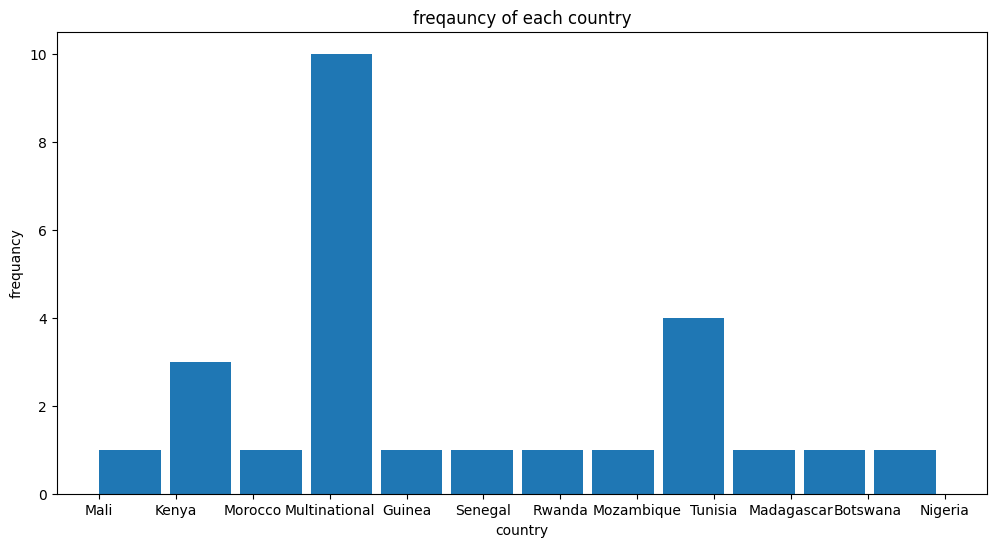

In [17]:
plt.figure(figsize=[12,6])
plt.hist(df3['Country'],bins=12,width=0.8)
plt.xlabel("country")
plt.ylabel("frequancy")
plt.title("freqauncy of each country");

In [18]:
import plotly_express as px
money_in_finace_by_each_country=(
    df3.groupby("Country")['Commitment in U.A'].mean().sort_values()
)

In [19]:
money_in_finace_by_each_country

Country
Madagascar       1.500000e+06
Guinea           5.853901e+06
Mali             7.290000e+06
Rwanda           1.024433e+07
Nigeria          1.071764e+07
Senegal          1.196726e+07
Mozambique       2.195213e+07
Multinational    3.077863e+07
Kenya            5.143397e+07
Tunisia          5.536166e+07
Botswana         5.799833e+07
Morocco          7.978172e+07
Name: Commitment in U.A, dtype: float64

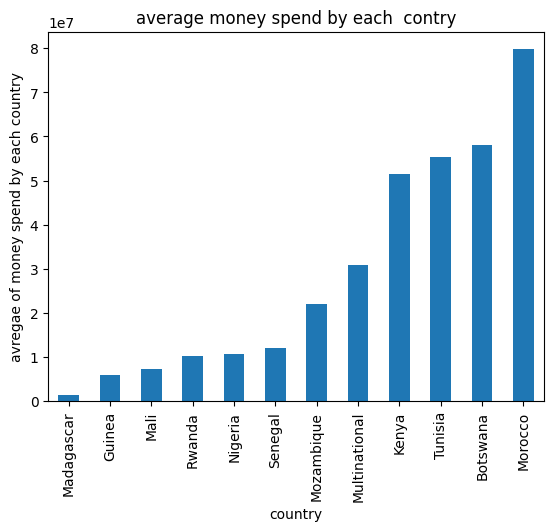

In [20]:
money_in_finace_by_each_country.plot(kind="bar")
plt.xlabel("country")
plt.ylabel("avregae of money spend by each country")
plt.title("average money spend by each  contry");

In [21]:
df3['Country'].value_counts().sort_values()

Country
Mali              1
Morocco           1
Guinea            1
Senegal           1
Rwanda            1
Mozambique        1
Madagascar        1
Botswana          1
Nigeria           1
Kenya             3
Tunisia           4
Multinational    10
Name: count, dtype: int64

In [22]:
money_in_finace_by_each_country

Country
Madagascar       1.500000e+06
Guinea           5.853901e+06
Mali             7.290000e+06
Rwanda           1.024433e+07
Nigeria          1.071764e+07
Senegal          1.196726e+07
Mozambique       2.195213e+07
Multinational    3.077863e+07
Kenya            5.143397e+07
Tunisia          5.536166e+07
Botswana         5.799833e+07
Morocco          7.978172e+07
Name: Commitment in U.A, dtype: float64

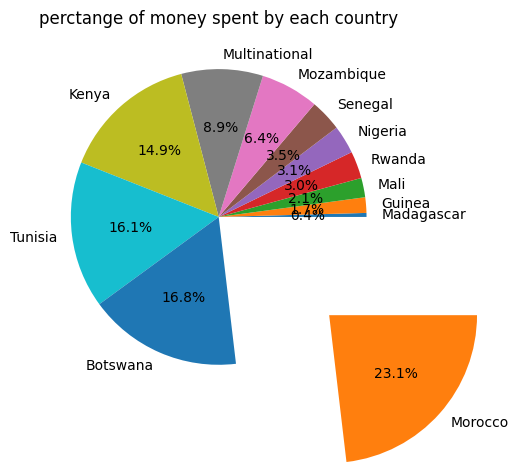

In [23]:
index=money_in_finace_by_each_country.index
index=index.to_list()
values=money_in_finace_by_each_country.values
values=list(values)
plt.pie(values,labels=index,autopct="%1.1f%%",explode=[0,0,0,0,0,0,0,0,0,0,0,1])
plt.title("perctange of money spent by each country");